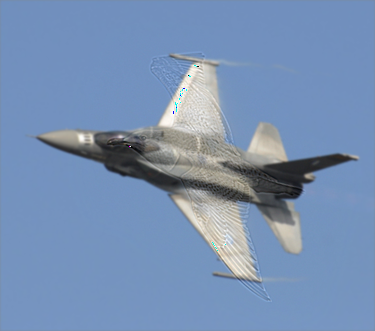

In [199]:
from PIL import Image
import numpy as np
import math
from scipy import signal

#set 1 info
setone1 = "/Users/diyaren/Desktop/CPSC425/Assignments/Assign1/hw1/0b_dog.bmp"
setonesigma1 = 6
setone2 = "/Users/diyaren/Desktop/CPSC425/Assignments/Assign1/hw1/0a_cat.bmp"
setonesigma2 = 6

#set 2 info
settwo1 = "/Users/diyaren/Desktop/CPSC425/Assignments/Assign1/hw1/2b_marilyn.bmp"
settwosigma1 = 3
settwo2 = "/Users/diyaren/Desktop/CPSC425/Assignments/Assign1/hw1/2a_einstein.bmp"
settwosigma2 = 3

#set 3 info
setthree1 = "/Users/diyaren/Desktop/CPSC425/Assignments/Assign1/hw1/4b_plane.bmp"
setthreesigma1 = 1
setthree2 = "/Users/diyaren/Desktop/CPSC425/Assignments/Assign1/hw1/4a_bird.bmp"
setthreesigma2 = 1

def gauss1d(sigma):
    len = round(6*sigma)
    if len%2==0:
        len = len+1
    else:
        len = len
       
    initArr = np.arange(-(int)(len/2),(int)(len/2+1))
    initArr = (1/(2*math.pi*math.pow(sigma,2)))*(np.exp(-np.power(initArr,2)/(2*math.pow(sigma,2))))
    sumArr = np.sum(initArr)
    result = initArr/sumArr
    return result

#this function returns a 2D Gaussian filter for a given value of sigma
def gauss2d(sigma):
    gau1d = gauss1d(sigma)
    gau1d = gau1d[np.newaxis]
    gauTrans = np.transpose(gau1d)
    ans = signal.convolve2d(gau1d,gauTrans)
    return ans

#this function applies Guassian convolution to a 2D array for the given value of sigma
def gaussconvolve2d(array,sigma):
    gau2d = gauss2d(sigma)
    ans = signal.convolve2d(array,gau2d,'same')
    return ans

#this function is to apply the low-pass filter for the first image
def lowfreqgauss(image,sigma):
    #split image into three channels and convert it to numpy array
    r,g,b= image.split()
    r = np.asarray(r)
    g = np.asarray(g)
    b = np.asarray(b)
    #applied gaussian to each of the channel
    rF = gaussconvolve2d(r,sigma)
    gF = gaussconvolve2d(g,sigma)
    bF = gaussconvolve2d(b,sigma)
    #set data type to uint8
    rF = rF.astype('uint8')
    gF = gF.astype('uint8')
    bF = bF.astype('uint8')
    #merge three arrays and get the final pic
    rImage = Image.fromarray(rF)
    gImage = Image.fromarray(gF)
    bImage = Image.fromarray(bF)
    filteredImage = Image.merge('RGB',(rImage,gImage,bImage))
    filteredImage.save("lowfreqimage.png") 
    filteredImage.show()
    return filteredImage

#this function is to apply the high-pass filter for the second image
def highfreqgauss(image,sigma):
    #save the original image rgb data for later use
    originr,origing,originb = image.split()
    originr = np.asarray(originr)
    origing = np.asarray(origing)
    originb = np.asarray(originb)
    #get the low-pass image first
    lowfreqpic = lowfreqgauss(image,sigma)
    lowr,lowg,lowb = lowfreqpic.split()   
    lowr = np.asarray(lowr)
    lowg = np.asarray(lowg)
    lowb = np.asarray(lowb) 
    #get the display version of high-pass pic's RGB
    rdisplay = originr - lowr +128
    gdisplay = origing - lowg +128 
    bdisplay = originb - lowb +128
    #get the computed version of high-pass pic's RGB
    rcomputed = originr - lowr
    gcomputed = origing - lowg
    bcomputed = originb - lowb

    rdisplayimage = Image.fromarray(rdisplay)
    gdisplayimage = Image.fromarray(gdisplay)
    bdisplayimage = Image.fromarray(bdisplay)  
 
    rcomputedimage = Image.fromarray(rcomputed)
    gcomputedimage = Image.fromarray(gcomputed)
    bcomputedimage = Image.fromarray(bcomputed)  
    #merge RGB arrays for both of the pics and save the pics
    highfreqdisplay = Image.merge('RGB',(rdisplayimage,gdisplayimage,bdisplayimage))
    highfreqresult = Image.merge('RGB',(rcomputedimage,gcomputedimage,bcomputedimage))
    highfreqdisplay.save("highfreqdisplay.png") 
    highfreqresult.save("highfreqresult.png") 
    highfreqdisplay.show()  
    return highfreqresult 

#this function is for getting the hybrid image by combining low-pass and high-pass pics
def hybridimage(image_path1,sigma1,image_path2,sigma2):
    #get low-pass pic
    img1 = Image.open(image_path1)
    img1.load()
    lowfreq = lowfreqgauss(img1,sigma1)   
    
    #get high-pass pic    
    img2 = Image.open(image_path2)
    img2.load() 
    highfreq = highfreqgauss(img2,sigma2) 
    
    lowfreq = np.asarray(lowfreq)
    highfreq = np.asarray(highfreq) 
    #get the hybrid image by adding two pics
    result = highfreq + lowfreq 
    #make sure all number are in the range[0,255]
    result = np.clip(result,0,255)
    result = result.astype('uint8')  
    result = Image.fromarray(result)   
    result.save("hybridimage.png")
    result.show()
    return result
    
hybridimage(setone1,setonesigma1,setone2,setonesigma2)
hybridimage(settwo1,settwosigma1,settwo2,settwosigma2)
hybridimage(setthree1,setthreesigma1,setthree2,setthreesigma2)
